In [1]:
import numpy as np
import pandas as pd
import statistics as st
import ast
import math
import matplotlib.pyplot as plt
import random as ran
from scipy.stats import variation

In [2]:
# creating pandas dataframes from csv files with word/bigram frequency data

### Mac
subtl_freq = pd.read_csv('/Users/rubi/Desktop/Github/typingexp/string_pool/SUBTLEXusExcel2007.csv')
guten_freq = pd.read_csv('/Users/rubi/Desktop/Github/typingexp/string_pool/bigram_freqs.csv')

### Ubuntu
# subtl_freq = pd.read_csv('/home/rubi/Desktop/Github/typingexp/string_pool/SUBTLEXusExcel2007.csv')
# guten_freq = pd.read_csv('/home/rubi/Desktop/Github/typingexp/string_pool/bigram_freqs.csv')

In [3]:
### Goal is to determine the word frequency, bigrams, bigram frequencies, average bigram frequency, and median bigram frequency for each
### word in the SUBLTEX lexicon. And put them all into one dataframe. 

In [4]:
# creating sub-dataset with only data we need
wf = subtl_freq[['Word','SUBTLWF']] # wf == word frequency
bf = guten_freq[['Bigrams', 'Frequency']] # bf == bigram frequency

In [5]:
# filtering for only words with 5 letters
fivewf = (wf[(wf.Word.str.len()==5)]).reset_index(drop=True)

In [6]:
# determining bigrams present in each word
bi_results = []
for x in fivewf['Word']:
    word = str(x).lower()
    bigrams_in_word = []
    for y in bf['Bigrams']:
        if y in word:
            bigrams_in_word.append(y)
    bi_results.append(bigrams_in_word)
    
biw = pd.DataFrame(bi_results, columns=['bi1', 'bi2', 'bi3', 'bi4']) # biw == bigrams in word

In [7]:
# determining frequency of bigrams present in each word
bf_results = []
for x in bi_results:
    bigram_freqs = []
    for y in bf['Bigrams']:
        if y in x:
            loc = bf.loc[bf['Bigrams']==y].index[0]
            bigram_freqs.append(bf.Frequency[loc])
    bf_results.append(bigram_freqs)
    
bf_byword = pd.DataFrame(bf_results, columns=['bf1', 'bf2', 'bf3', 'bf4'])

In [8]:
# find bigram frequency average for each word
avg_freq = []
for x in bf_results:
    avg_freq.append(st.mean(x))
    
bf_avg = pd.DataFrame(avg_freq, columns=['average bf'])

In [9]:
# find median bigram frequency for each word
med_freq = []
for x in bf_results:
    med_freq.append(st.median(x))
    
bf_med = pd.DataFrame(med_freq, columns=['median bf'])

In [10]:
# combining all info into one data frame
all_info = pd.concat([fivewf, biw, bf_byword, bf_avg, bf_med], axis=1)

# data sorted by average bigram frequency (highest to lowest)
sorted_all = (all_info.sort_values(by='average bf', ascending=False)).reset_index(drop=True)
sorted_all

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
0,there,4348.12,er,he,re,th,12934901,21484684,10687711,22288309.0,16848901,17209792.5
1,ither,0.08,er,he,it,th,12934901,21484684,6637233,22288309.0,15836281,17209792.5
2,Uther,1.06,er,he,th,ut,12934901,21484684,22288309,3257233.0,14991281,17209792.5
3,other,735.39,er,he,ot,th,12934901,21484684,2906507,22288309.0,14903600,17209792.5
4,ether,2.12,er,et,he,th,12934901,2499226,21484684,22288309.0,14801780,17209792.5
...,...,...,...,...,...,...,...,...,...,...,...,...
6773,pukka,0.08,ka,kk,pu,uk,60568,1820,514720,33610.0,152679,47089.0
6774,Gypsy,6.63,gy,ps,sy,yp,52572,271689,160250,45202.0,132428,106411.0
6775,Kudzu,0.10,dz,ku,ud,zu,388,8936,458716,5050.0,118272,6993.0
6776,jazzy,0.49,az,ja,zy,zz,90138,40073,10486,27727.0,42106,33900.0


In [11]:
### Filtering to select words to go in each word/bigram category

### NOTE: useful for displaying entire dataframe
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can also be specified
#     print(medbf_sorted)

In [12]:
# sample words with highest average bigram freq
hibf_words = sorted_all[sorted_all['average bf'] > 10000000]

In [13]:
# sort by word frequency
hibf_sorted = hibf_words.sort_values(by='SUBTLWF', ascending=False).reset_index(drop=True)
# hibf_sorted

## Selected words
# Most familiar : there, think -- highest values for both word freq and average bf
# Semi familiar : cheer, theme -- closest word freq to mean with high average bf
# Un familiar : tithe, therm -- highest average bf values with lowest word freq values

In [14]:
# sample of words with medium average bigram freq, based on mean average bigram freq
medbf_words = sorted_all[sorted_all['average bf'].between(3200000, 3500000)]

In [15]:
medbf_sorted_oldindex = medbf_words.sort_values(by='SUBTLWF', ascending=False)
medbf_sorted = medbf_sorted_oldindex.reset_index(drop=True)
# medbf_sorted

# Words I selected
# Most familiar: about, would -- closest average bf to mean with the highest word freq value
# Semi familar: belly, champ -- closest average bf to mean with closest word freq to mean
# Un familiar: haole, cooed -- closest average bf to mean with the lowest word freq value

In [16]:
# sample of words with low average bigram freq
lowbf_words = sorted_all[sorted_all['average bf'] < 800000]
# lowbf_words

In [17]:
lowbf_sorted = (lowbf_words.sort_values(by='SUBTLWF', ascending=False)).reset_index(drop=True)
# lowbf_sorted

# Words I selected
# Most familiar: lucky, buddy -- lowest average bf with word freqs in the triple digits
# Semi familar: puppy, vodka -- closest word freq to mean with low average bf
# Un familiar: faqir, druze -- lowest word freq with low average bf

In [18]:
### Determining frequency variables of pseudo words to select strings for each bf category

pseudo_array = ['edthe', 'heond', 'kremp', 'vanru', 'zibja', 'pykka']

# creating dataframe of bigram freqs in each word
pw = pd.DataFrame(pseudo_array, columns=['Word']) # pw == pseudo words

# determining bigrams present in each word
bi_results = []
for x in pseudo_array:
    word = str(x).lower()
    bigrams_in_word = []
    for y in bf['Bigrams']:
        if y in word:
            bigrams_in_word.append(y)
    bi_results.append(bigrams_in_word)
    
# creating dataframe of bigrams in each word
biw = pd.DataFrame(bi_results, columns=['bi1', 'bi2', 'bi3', 'bi4']) # biw == bigrams in word

# determining frequency of bigrams present in each word
bf_results = []
for x in bi_results:
    bigram_freqs = []
    for y in bf['Bigrams']:
        if y in x:
            loc = bf.loc[bf['Bigrams']==y].index[0]
            bigram_freqs.append(bf.Frequency[loc])
    bf_results.append(bigram_freqs)
    
# creating dataframe of bigram freqs in each word
bf_byword = pd.DataFrame(bf_results, columns=['bf1', 'bf2', 'bf3', 'bf4'])

# find bigram frequency average for each word
avg_freq = []
for x in bf_results:
    avg_freq.append(st.mean(x))
    
# creating dataframe of average bigram freq for each word
bf_avg = pd.DataFrame(avg_freq, columns=['average bf'])

In [19]:
# combining all info into one data frame
pseudo_info = pd.concat([pw, biw, bf_byword, bf_avg], axis=1)
pseudo_info

# Words I selected
# High bigram freq: edthe, heond -- above cutoff used for high avg bf in previous cell
# Medium bigram freq: kremp, vanru  -- closest to average bf mean (3398019.67)
# Low bigram freq: zibja, pykka -- significantly below cutoff used for low avg bf in previous cell

## Note: vanru replaced isvar -- isvar is a commonly used function in MATLAB

,Word,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf
0,edthe,dt,ed,he,th,11191,7805967,21484684,22288309,12897537
1,heond,eo,he,nd,on,305120,21484684,9414961,8830487,10008813
2,kremp,em,kr,mp,re,2039661,5683,1042198,10687711,3443813
3,vanru,an,nr,ru,va,12315713,54341,705492,560130,3408919
4,zibja,bj,ib,ja,zi,105433,493267,40073,54565,173334
5,pykka,ka,kk,py,yk,60568,1820,149099,4767,54063


In [20]:
# making dataframe of only chosen string data
string_list = ['there', 'think', 'about', 'would', 'lucky', 'buddy',
          'cheer', 'theme', 'belly', 'champ', 'puppy', 'vodka',
          'tithe', 'therm', 'haole', 'cooed', 'faqir', 'druze',
          'edthe', 'heond', 'kremp', 'vanru', 'zibja', 'pykka']

word_info = sorted_all.query("Word in @string_list")
chosen_strings = (pd.concat([word_info, pseudo_info])).reset_index(drop=True)
chosen_strings

,Word,SUBTLWF,bi1,bi2,bi3,bi4,bf1,bf2,bf3,bf4,average bf,median bf
0,there,4348.12,er,he,re,th,12934901,21484684,10687711,22288309.0,16848901,17209792.5
1,therm,0.02,er,he,rm,th,12934901,21484684,905131,22288309.0,14403256,17209792.5
2,tithe,0.02,he,it,th,ti,21484684,6637233,22288309,5135552.0,13886444,14060958.5
3,theme,13.92,em,he,me,th,2039661,21484684,4724108,22288309.0,12634190,13104396.0
4,think,2691.39,hi,in,nk,th,6198006,13597302,445067,22288309.0,10632171,9897654.0
5,cheer,18.69,ch,ee,er,he,3267507,2839722,12934901,21484684.0,10131703,8101204.0
6,belly,15.57,be,el,ll,ly,3798740,3235254,4235407,2589130.0,3464632,3516997.0
7,haole,0.02,ao,ha,le,ol,25487,6967591,5038239,1804856.0,3459043,3421547.5
8,cooed,0.02,co,ed,oe,oo,3609272,7805967,270012,1933683.0,3404733,2771477.5
9,would,1767.88,ld,ou,ul,wo,2012500,7425307,2181271,1723496.0,3335643,2096885.5


In [21]:
# making list of all bigrams in selected words (no repeats)
cols = ['bi1', 'bi2', 'bi3', 'bi4']

temp_bigrams = (chosen_strings[cols].values.tolist())
chosen_bigrams = list(set([x for sublist in temp_bigrams for x in sublist]))

# chosen_bigrams

In [22]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 
            'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

## defining function to make nonsense word with avg bf == value of interest (didn't work - never generated usable strings in a reasonable amount of time)
def make_pseudo(bf_avg):
    for i in range(0, 1000000):
        pseudos_byavg = []
        letters = ran.sample(alphabet, k=5)
        word = ''.join(letters)
        bigrams_in_word = []
        for y in bf['Bigrams']:
            if y in word:
                bigrams_in_word.append(y)
        bigram_freqs = []
        for x in bigrams_in_word:
            for y in bf['Bigrams']:
                if y in x:
                    loc = bf.loc[bf['Bigrams']==y].index[0]
                    bigram_freqs.append(bf.Frequency[loc])
        avg_bf = (sum(bigram_freqs)/len(bigram_freqs))
        if math.isclose(avg_bf, bf_avg, abs_tol=9999) == True:
            pseudos_byavg.append(word)
    return pseudos_byavg

In [23]:
### Plots and lexicon data that was useful for selecting words

<AxesSubplot:xlabel='Word'>

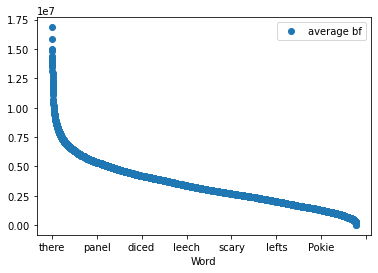

In [24]:
# plot of all words by average bigram freq
sorted_all.plot(x='Word', y='average bf', style='o')

<AxesSubplot:xlabel='Word'>

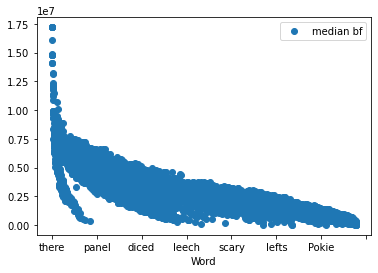

In [25]:
# plot of all words by median bigram freq
sorted_all.plot(x='Word', y='median bf', style='o')

array([[<AxesSubplot:title={'center':'average bf'}>]], dtype=object)

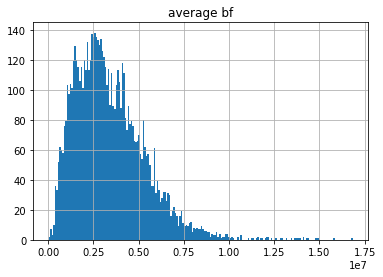

In [26]:
# histogram of average bigram freq
sorted_all.hist(column='average bf', bins=200)

array([[<AxesSubplot:title={'center':'SUBTLWF'}>]], dtype=object)

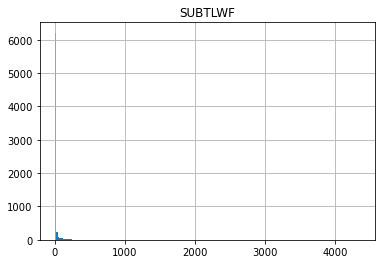

In [27]:
# histogram of word freq
sorted_all.hist(column='SUBTLWF', bins=200)

In [28]:
print(st.median(sorted_all['average bf']))
print(st.mean(sorted_all['average bf']))

3070789.0
3398019.6708468576


In [29]:
# bigrams sorted by freq (highest to lowest)
sorted_bf = bf.sort_values(by='Frequency', ascending=False, ignore_index=True)
sorted_bf

,Bigrams,Frequency
0,th,22288309
1,he,21484684
2,in,13597302
3,er,12934901
4,an,12315713
...,...,...
671,qg,1
672,qp,0
673,qk,0
674,qj,0


In [30]:
# chosen bigrams with frequencies
chosen_byfreq = pd.DataFrame(columns=['Bigrams', 'Frequency'])
for bg in chosen_bigrams:
    for index, data in bf.iterrows():
        if bf['Bigrams'][index] == bg:
            chosen_byfreq = chosen_byfreq.append(bf.iloc[index, :], ignore_index=True)
            
# chosen_byfreq.to_csv('bg_freqs.csv')
chosen_byfreq

,Bigrams,Frequency
0,up,968744
1,dy,360103
2,on,8830487
3,oo,1933683
4,ol,1804856
...,...,...
65,fa,1043958
66,ll,4235407
67,ou,7425307
68,oe,270012


<AxesSubplot:xlabel='Bigrams'>

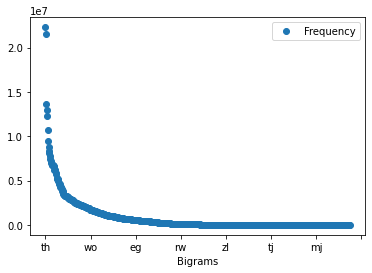

In [31]:
# Bigrams plotted by frequency
sorted_bf.plot(x='Bigrams', y='Frequency', style='o')

array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

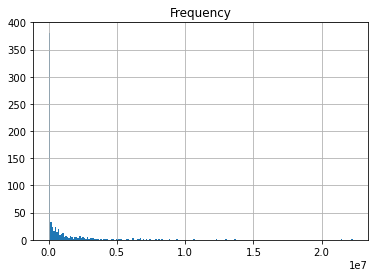

In [32]:
# histogram of bigrams sorted by frequency
sorted_bf.hist(column='Frequency', bins=200)

In [33]:
print(st.median(sorted_all['SUBTLWF']))
print(st.mean(sorted_all['SUBTLWF']))

0.47
15.142115668338743


In [34]:
print(st.median(bf['Frequency']))
print(st.mean(bf['Frequency']))

51669.0
864722.4511834319


In [35]:
# useful for filtering ## wf.set_index('Word').filter(like=x, axis=0)  